In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ten_min_flow_density_data = pd.read_csv("data/1min_200_m_flow_speed_1hr.csv")
print(ten_min_flow_density_data)

                               Time       Space       Flow    Density
0     2022-11-30 13:00:00.400000095   94376.195  4121.8746  51.723330
1     2022-11-30 13:00:00.400000095   94576.195  4151.2389  51.043329
2     2022-11-30 13:00:00.400000095   94776.195  4217.5929  54.286663
3     2022-11-30 13:00:00.400000095   94976.195  4766.3751  68.206661
4     2022-11-30 13:00:00.400000095   95176.195  3272.3088  64.369997
...                             ...         ...        ...        ...
2035  2022-11-30 13:59:00.400000095  100176.195   783.2829  45.476664
2036  2022-11-30 13:59:00.400000095  100376.195  1778.8575  93.209997
2037  2022-11-30 13:59:00.400000095  100576.195  2012.9730  93.593330
2038  2022-11-30 13:59:00.400000095  100776.195  2956.3275  67.356663
2039  2022-11-30 13:59:00.400000095  100976.195  1260.6258  21.673332

[2040 rows x 4 columns]


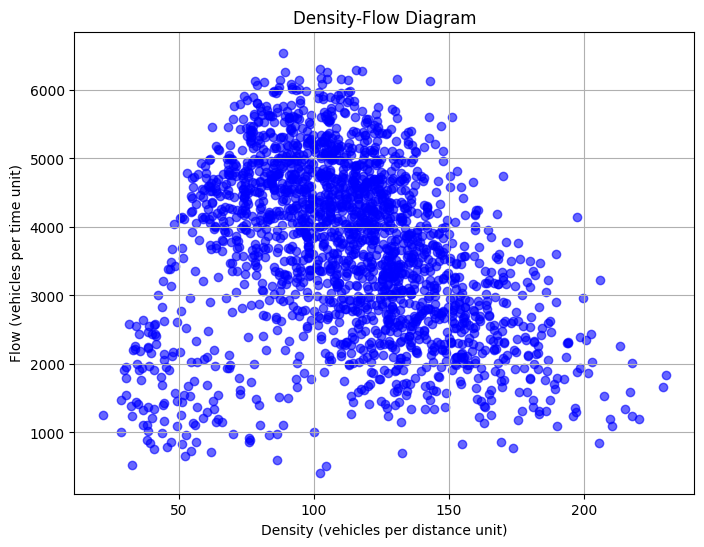

In [3]:
flow = ten_min_flow_density_data["Flow"]
density = ten_min_flow_density_data["Density"]

plt.figure(figsize=(8, 6))
plt.scatter(density, flow, c='blue', alpha=0.6)
# plt.xlim(0, 6000)
plt.title('Density-Flow Diagram')
plt.xlabel('Density (vehicles per distance unit)')
plt.ylabel('Flow (vehicles per time unit)')
plt.grid(True)
plt.show()

Corrected Jam Density: 277.46 vehicles/unit distance


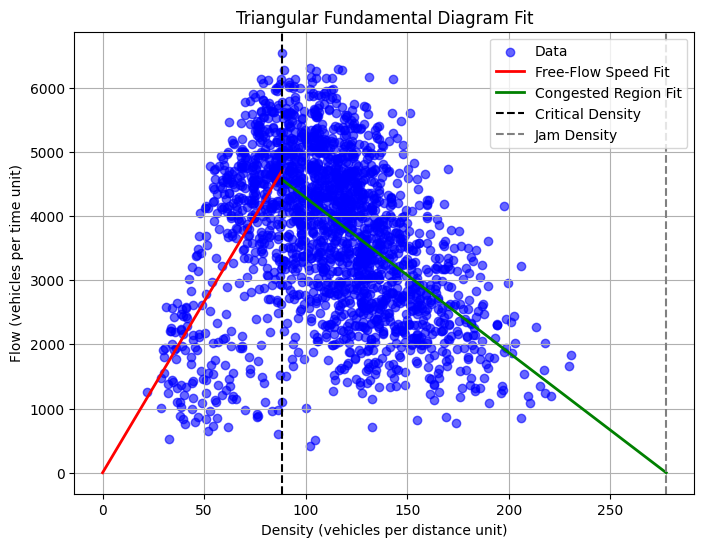

Estimated Free-Flow Speed: 53.28 km/h
Estimated Congestion Wave Speed: -24.15 km/h
Estimated Critical Density: 88.40 vehicles/unit distance
Estimated Jam Density: 277.46 vehicles/unit distance
Capacity drop: 144.40727698443607


In [8]:
flow = ten_min_flow_density_data["Flow"].values
density = ten_min_flow_density_data["Density"].values

# Step 1: Identify critical density (density at max flow)
rho_c = density[np.argmax(flow)]
q_max = max(flow)  # Maximum flow at rho_c

# Step 2: Estimate free-flow speed using linear regression for low densities
mask_free_flow = density < rho_c
vf, _ = np.polyfit(density[mask_free_flow], flow[mask_free_flow], 1)  # Free-flow slope

# Step 3: Estimate congestion wave speed using linear regression for congested region
mask_congested = density > rho_c
# Fit a line to the congested region (rho > rho_c)
w, b = np.polyfit(density[mask_congested], flow[mask_congested], 1)  # Get slope & intercept

# Compute jam density correctly
rho_j = -b / w  # Find where flow reaches 0

# Generate points for free-flow and congested lines
rho_free_flow = np.linspace(0, rho_c, 100)
flow_free_flow = vf * rho_free_flow  # Free-flow equation: q = v_f * rho

rho_congested = np.linspace(rho_c, rho_j, 100)
flow_congested = w * rho_congested + b  # Corrected equation

print(f"Corrected Jam Density: {rho_j:.2f} vehicles/unit distance")


# Plot original data
plt.figure(figsize=(8, 6))
plt.scatter(density, flow, c='blue', alpha=0.6, label="Data")

# Plot free-flow speed line
plt.plot(rho_free_flow, flow_free_flow, 'r-', linewidth=2, label="Free-Flow Speed Fit")

# Plot congested region line
plt.plot(rho_congested, flow_congested, 'g-', linewidth=2, label="Congested Region Fit")

plt.axvline(rho_c, color='black', linestyle="--", label="Critical Density")
plt.axvline(rho_j, color='gray', linestyle="--", label="Jam Density")

plt.xlabel("Density (vehicles per distance unit)")
plt.ylabel("Flow (vehicles per time unit)")
plt.title("Triangular Fundamental Diagram Fit")
plt.legend()
plt.grid(True)
plt.show()

# Calculate capacity drop
cap_drop = flow_free_flow[-1] - flow_congested[0]
# Print estimated parameters
print(f"Estimated Free-Flow Speed: {vf:.2f} km/h")
print(f"Estimated Congestion Wave Speed: {w:.2f} km/h")
print(f"Estimated Critical Density: {rho_c:.2f} vehicles/unit distance")
print(f"Estimated Jam Density: {rho_j:.2f} vehicles/unit distance")
print(f"Capacity drop: {cap_drop}")